In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train = scaler.transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [11]:
from sklearn.svm import SVC

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10],
        'gamma': [0.01, 0.1, 1, 10]
    }
]

In [14]:
estimator = GridSearchCV(SVC(), param_grid=params, cv=5, verbose=5, scoring='accuracy')

In [15]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.930 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=5)

In [16]:
estimator.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [17]:
model = estimator.best_estimator_

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [20]:
accuracy_score(y_test, y_pred)

0.9790209790209791

In [21]:
confusion_matrix(y_test, y_pred)

array([[50,  3],
       [ 0, 90]])

In [22]:
f1_score(y_test, y_pred)

0.9836065573770492

In [23]:
y_train_pred = model.predict(X_train)

In [24]:
accuracy_score(y_train, y_train_pred)

0.9859154929577465

In [25]:
confusion_matrix(y_train, y_train_pred)

array([[153,   6],
       [  0, 267]])

In [26]:
f1_score(y_train, y_train_pred)

0.9888888888888889

In [27]:
# KERNELI

In [28]:
num_instances = 1000
X = np.random.uniform(low=-1, high=1, size=(num_instances, 2))

In [29]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [30]:
y = f(X[:, 0], X[:, 1])

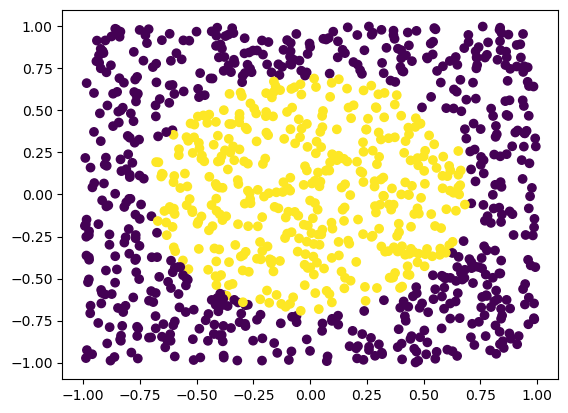

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [32]:
model = SVC(kernel='linear')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [34]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
y_train_pred = model.predict(X_train)

In [36]:
accuracy_score(y_train, y_train_pred)

0.6026666666666667

In [37]:
y_test_pred = model.predict(X_test)

In [38]:
accuracy_score(y_test, y_test_pred)

0.604

In [39]:
model = SVC(kernel='rbf')

In [40]:
model.fit(X_train, y_train)

SVC()

In [41]:
accuracy_score(y_train, model.predict(X_train))

0.9853333333333333

In [42]:
accuracy_score(y_test, model.predict(X_test))

0.988

In [43]:
print(f'Broj potpornih vektora: {model.n_support_}')

Broj potpornih vektora: [84 84]


In [44]:
print(f'Indeksi instanci koji su potporni vektori: {model.support_}')

Indeksi instanci koji su potporni vektori: [  9  13  24  54  63  73  87  92  98 101 107 114 121 130 137 141 143 157
 159 179 184 186 222 237 239 250 271 272 275 293 321 328 329 337 357 358
 367 372 392 396 397 414 429 437 464 473 484 494 495 500 501 511 513 521
 525 528 530 540 543 548 553 558 560 573 595 596 598 621 631 644 646 651
 653 654 657 659 671 686 687 691 714 722 725 732  23  28  37  44  48  62
  68  88  97 103 110 112 115 120 133 156 158 167 172 174 175 187 189 191
 205 221 236 238 246 263 265 283 288 294 311 315 325 334 351 352 363 366
 393 399 407 413 426 431 445 447 452 457 485 518 537 546 554 581 590 603
 604 606 615 620 625 626 629 633 661 664 666 668 676 678 680 685 695 709
 715 726 730 734 740 744]


In [45]:
print(f'Sami potporni vektori: {model.support_vectors_}')

Sami potporni vektori: [[-5.44740925e-01 -5.00549200e-01]
 [-7.94904792e-01  1.03343611e-01]
 [-5.39261736e-01 -5.07128910e-01]
 [ 4.12044509e-01 -6.36269337e-01]
 [ 6.81949255e-01  3.88133590e-01]
 [ 9.59258080e-02 -7.51707917e-01]
 [ 5.43239264e-02 -7.67094770e-01]
 [-5.80550926e-01 -4.31161895e-01]
 [-6.75048853e-01 -2.27726975e-01]
 [ 9.70132089e-02 -7.39324814e-01]
 [ 5.33043207e-01  5.80146484e-01]
 [ 6.54294101e-01 -3.71237770e-01]
 [ 2.09217710e-01  7.72368451e-01]
 [-2.58103507e-01  7.26995445e-01]
 [-5.96497637e-01 -4.36087113e-01]
 [ 8.08786687e-01 -8.33475508e-02]
 [-7.45229376e-01 -5.95731344e-02]
 [-2.27214268e-02  7.07156596e-01]
 [-3.87512992e-01 -6.57832272e-01]
 [-2.99751896e-01  6.67749234e-01]
 [-6.05598726e-01 -4.62388289e-01]
 [-6.06814473e-01  3.81754312e-01]
 [-1.23575174e-01  7.58559792e-01]
 [-7.51022305e-01 -1.45394022e-01]
 [-4.89847345e-01  5.78664969e-01]
 [ 2.28198348e-01  7.17262104e-01]
 [ 7.63553111e-01 -6.20967052e-02]
 [ 6.66285041e-01  4.94893684e-0

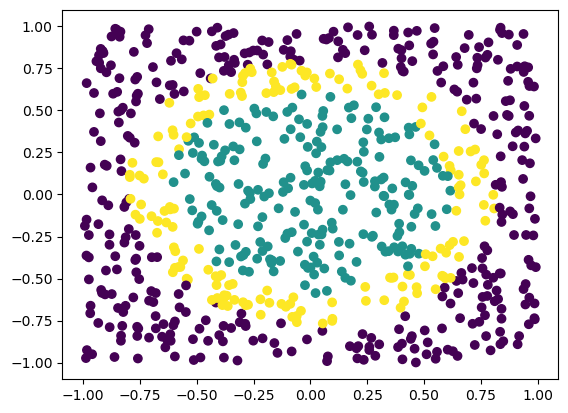

In [47]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:,0], X_train[:,1], c=color)
plt.show()